In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [6]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,yes,yes,no,no,yes,yes,no,yes,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,no,no,no,no,no,no,no,no,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,no,no,no,no,no,no,no,no,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,no,yes,no,yes,yes,yes,no,no,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,no,no,no,yes,yes,yes,no,yes,Greenwich Village,All Downtown,Manhattan


In [7]:
rentals.no_fee.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_patio.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'}, inplace=True)

In [8]:
rentals.describe(include='all')

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,93,15,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,Upper West Side,All Downtown,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2852,4357,4331,3860,3800,4222,4772,4281,579,1229,3539
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Univariate (one variable)

### Quantitative

In [12]:
rent_mean = np.mean(rentals.rent)
print(rent_mean)

4536.9208


In [14]:
rent_median = rentals.rent.median()
print(rent_median)

3600.0


In [15]:
rentals.rent[0:10].median()

3700.0

In [19]:
#Note the 5th and 6th figures below - what's their average?
np.sort(rentals.rent[0:10])

array([ 1950,  2550,  3000,  3500,  3600,  3800,  4500,  4795, 11500,
       17500], dtype=int64)

In [23]:
import scipy.stats

In [27]:
#Cuts the lowest and highest 10% from rentals.rent
print(scipy.stats.trim_mean(rentals.rent, 0.1))

3980.253


In [28]:
print(rentals.rent.mode())

0    3500
dtype: int64


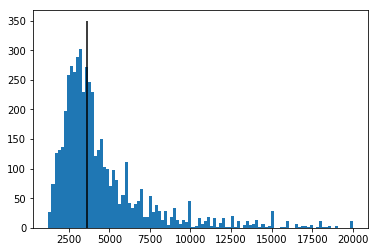

In [39]:
plt.hist(rentals.rent, bins = 100)
plt.vlines(x = rent_median, ymin=0, ymax= 350, colors='k', label='median')
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


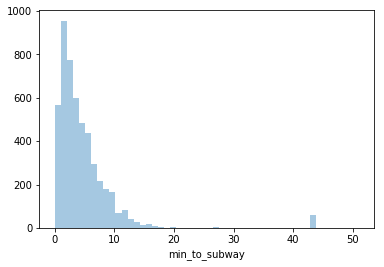

In [43]:
sns.distplot(rentals.min_to_subway, kde = False)
plt.show()

In [44]:
rentals[rentals.min_to_subway > 40]

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
16,404,17340497,2950,1.0,1,550,43,17.0,14,yes,yes,no,yes,yes,no,no,no,Upper East Side,All Upper East Side,Manhattan
55,403,17340497,3625,1.0,1,650,43,19.0,14,yes,no,no,no,no,no,no,no,Upper East Side,All Upper East Side,Manhattan
104,1554,33299325,4890,1.0,1,815,43,7.0,8,yes,no,no,no,yes,no,no,no,Upper West Side,All Upper West Side,Manhattan
131,3458,89875520,4995,2.0,2,1153,43,16.0,9,no,no,no,no,no,no,no,no,Roosevelt Island,All Upper East Side,Manhattan
156,7024,33299325,13750,3.0,3,1920,43,8.0,8,yes,no,no,no,no,no,no,no,Upper West Side,All Upper West Side,Manhattan
269,3516,7860298,1975,1.0,1,700,43,20.0,42,no,no,no,no,no,no,no,no,Kew Gardens,Northeast Queens,Queens
331,78,33299325,13500,3.0,3,1868,43,32.0,8,no,no,no,no,no,no,yes,no,Upper West Side,All Upper West Side,Manhattan
554,4787,40556781,3300,1.0,1,787,43,4.0,5,no,no,no,yes,no,no,no,no,Long Island City,Northwest Queens,Queens
626,10680,21144835,7800,2.0,2,1404,43,35.0,10,no,no,yes,yes,yes,yes,no,yes,Battery Park City,All Downtown,Manhattan
629,7836,17340497,3650,2.0,1,850,43,3.0,14,yes,no,no,no,no,no,no,no,Upper East Side,All Upper East Side,Manhattan


In [45]:
np.min(rentals.rent)

1250

In [46]:
np.max(rentals.rent)

20000

In [47]:
np.std(rentals.rent)

2929.5459546024153

(array([  9.,  31., 100., 176., 236., 248., 115.,  48.,  28.,   9.]),
 array([ 7.09585703,  7.71070536,  8.3255537 ,  8.94040203,  9.55525037,
        10.1700987 , 10.78494703, 11.39979537, 12.0146437 , 12.62949204,
        13.24434037]),
 <a list of 10 Patch objects>)

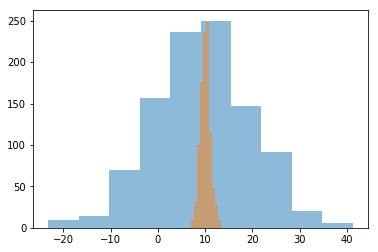

In [52]:
#standard deviation = 1
small_std = np.random.normal(10, 1, 1000)
#standard deviation = 10
large_std = np.random.normal(10, 10, 1000)

#An Alpha < 1 makes the plot transparent
plt.hist(large_std, alpha=0.5)
plt.hist(small_std, alpha=0.5)

### Categorical

In [54]:
rentals.borough.value_counts()

Manhattan    3539
Brooklyn     1013
Queens        448
Name: borough, dtype: int64

In [55]:
rentals.borough.value_counts(normalize = True)

Manhattan    0.7078
Brooklyn     0.2026
Queens       0.0896
Name: borough, dtype: float64

In [59]:
rentals.loc[0, 'borough'] = np.nan

In [60]:
rentals.borough.value_counts(normalize = True)

Manhattan    0.707742
Brooklyn     0.202641
Queens       0.089618
Name: borough, dtype: float64

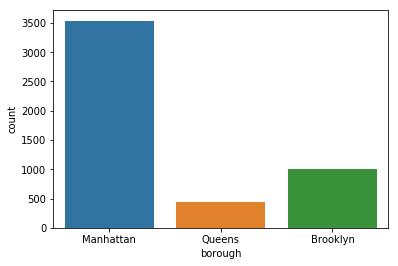

In [61]:
sns.countplot(rentals.borough)